# 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv("data_sarb.csv")

In [3]:
df.head()

,Date,GDP,GFCF,UNEM,ConsumerPrices,GovExp,HouseExp
0,1994-03-31,2347597.0,274432.0,20.0,25.666667,505201.0,1341416.0
1,1994-06-30,2370502.0,280433.0,20.0,26.000000,505206.0,1354509.0
2,1994-09-30,2397159.0,288152.0,20.0,27.000000,502942.0,1368367.0
3,1994-12-31,2441705.0,299025.0,20.0,27.333333,497292.0,1385567.0
4,1995-03-31,2447808.0,305911.0,17.0,28.000000,484801.0,1415147.0


In [5]:
df.dtypes

Date               object
GDP               float64
GFCF              float64
UNEM              float64
ConsumerPrices    float64
GovExp            float64
HouseExp          float64
dtype: object

In [6]:
df.describe()

,GDP,GFCF,UNEM,ConsumerPrices,GovExp,HouseExp
count,1.200000e+02,1.200000e+02,120.000000,120.000000,1.200000e+02,1.200000e+02
mean,6.688985e+06,1.208034e+06,51.033333,124.122222,1.458945e+06,4.670058e+06
std,3.278402e+07,6.811389e+06,280.699065,679.387123,8.304558e+06,2.573719e+07
min,2.347597e+06,2.744320e+05,17.000000,25.666667,4.649380e+05,1.341416e+06
25%,2.902988e+06,3.801648e+05,23.000000,42.250000,5.280665e+05,1.739040e+06
50%,3.899362e+06,6.525295e+05,25.000000,59.166667,7.368300e+05,2.438482e+06
75%,4.450160e+06,7.548502e+05,27.250000,80.666667,8.531228e+05,2.834947e+06
max,3.627273e+08,7.517620e+07,3100.000000,7500.000000,9.165680e+07,2.841879e+08


In [8]:
# Checking for missing values
df.isnull().sum()

Date              0
GDP               1
GFCF              1
UNEM              1
ConsumerPrices    1
GovExp            1
HouseExp          1
dtype: int64

In [9]:
# I checked if all the missing values from the different columns were from the same row which would've made it easier to just drop that 1 row.
# But it wasn't the case, the missing values are all from different rows, I am not comfortable dropping 5 rows from a total of 121 rows.
df_cleaned = df.dropna(subset=['GDP'])
missing_values = df_cleaned.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Date              0
GDP               0
GFCF              1
UNEM              1
ConsumerPrices    1
GovExp            1
HouseExp          1
dtype: int64


In [10]:
# I filled the missing numerical values with the mean, and categorical with the mode
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

In [11]:
# Checked again for missing values
df.isnull().sum()

Date              0
GDP               0
GFCF              0
UNEM              0
ConsumerPrices    0
GovExp            0
HouseExp          0
dtype: int64

In [12]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

In [13]:
# Converting 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

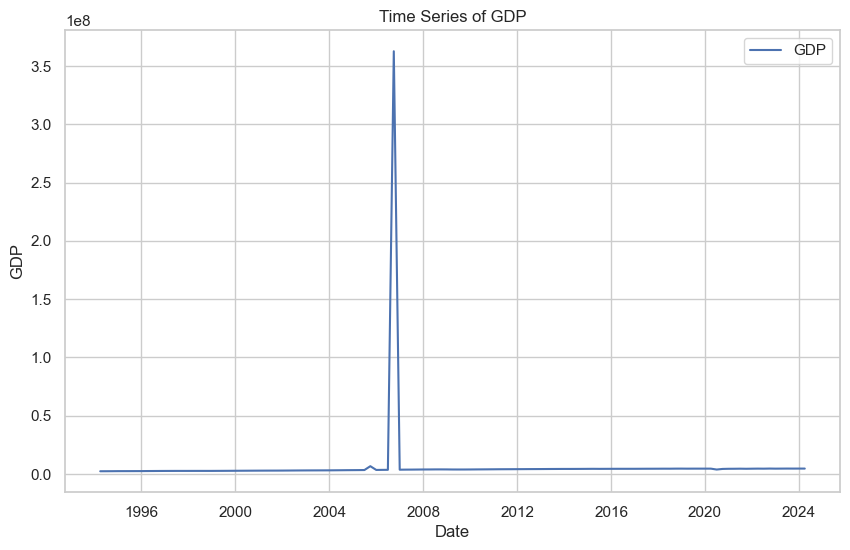

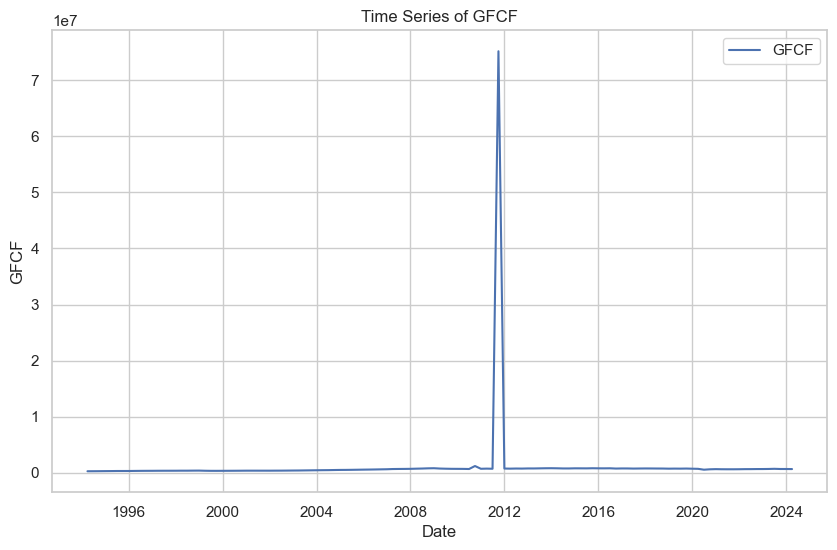

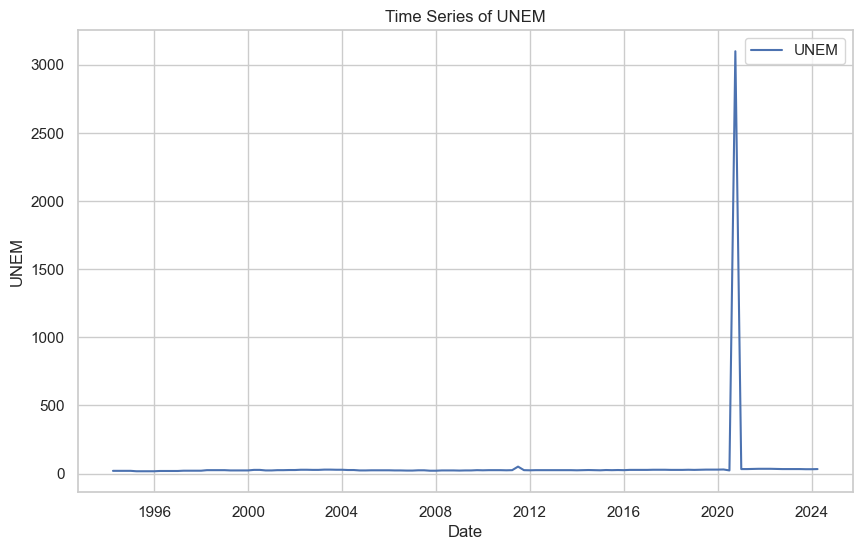

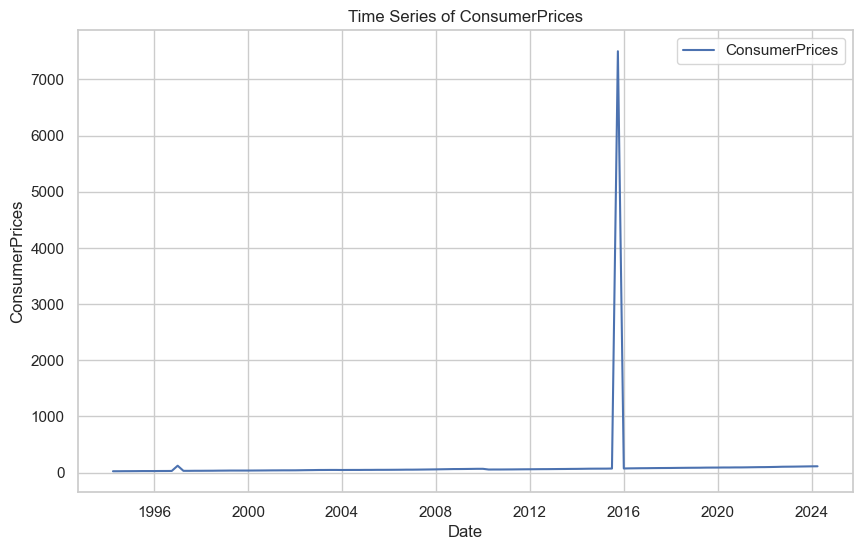

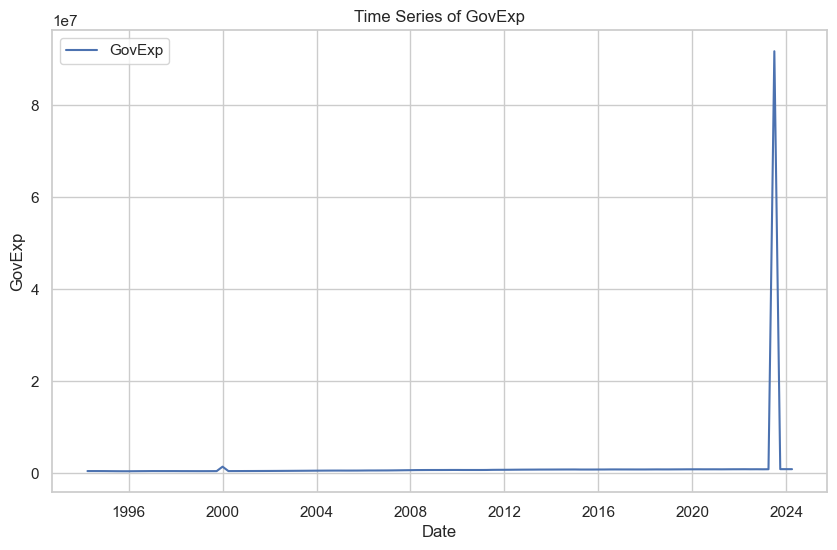

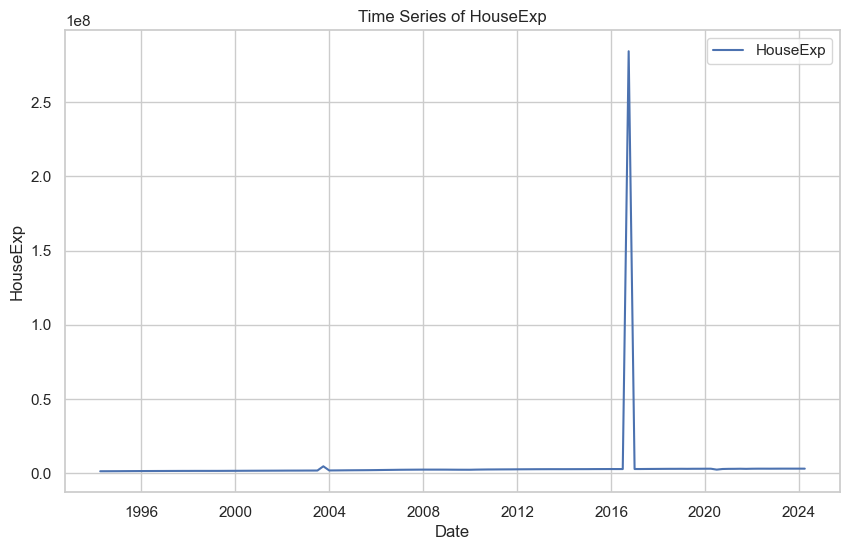

In [14]:
# Plotting all columns except the 'Date' column
for column in df.columns:
    if column != 'Date':
        plt.figure(figsize=(10, 6))
        plt.plot(df['Date'], df[column], label=column)
        plt.title(f'Time Series of {column}')
        plt.xlabel('Date')
        plt.ylabel(column)
        plt.legend()
        plt.show()

C:\Users\madzi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


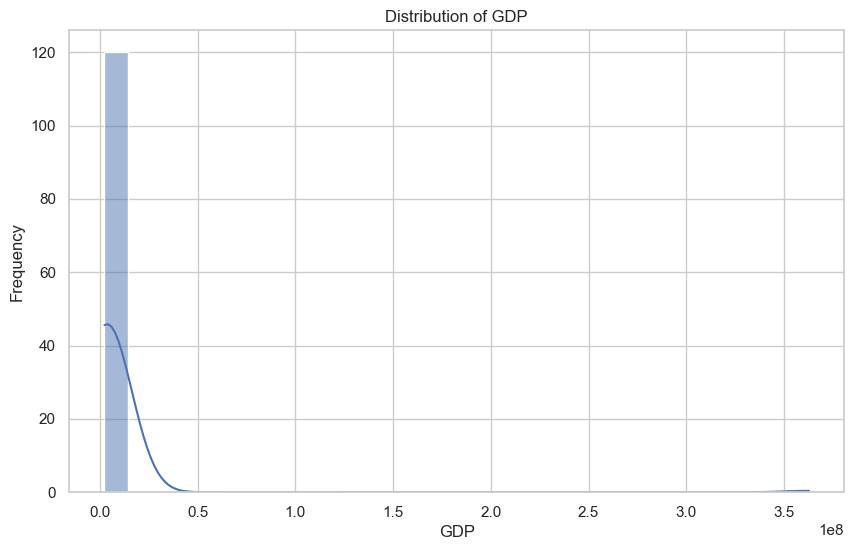

C:\Users\madzi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


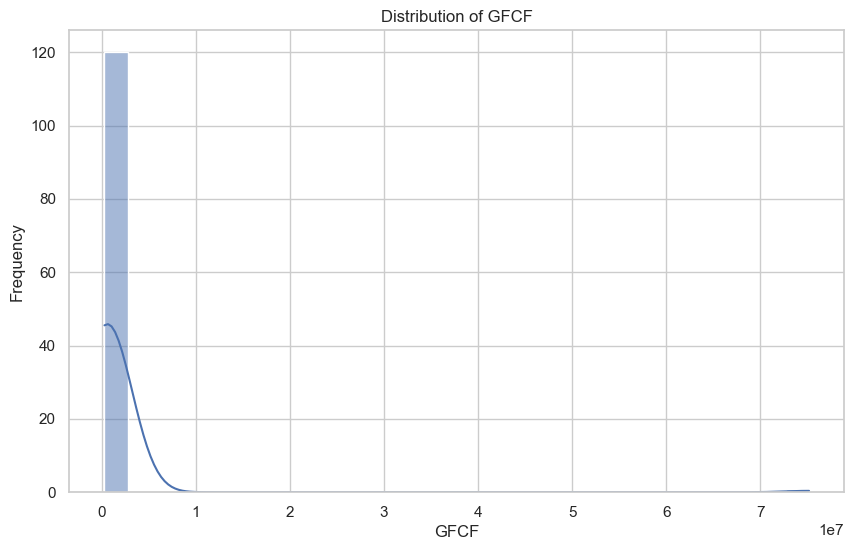

C:\Users\madzi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


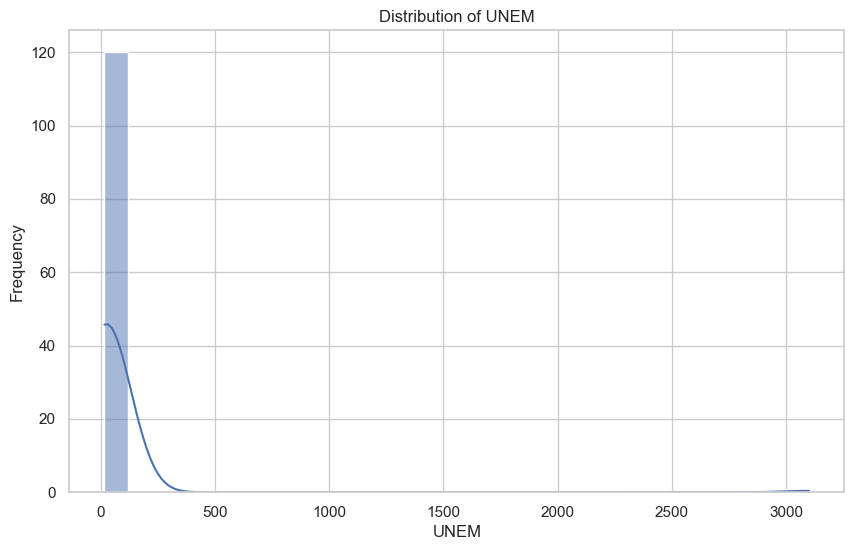

C:\Users\madzi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


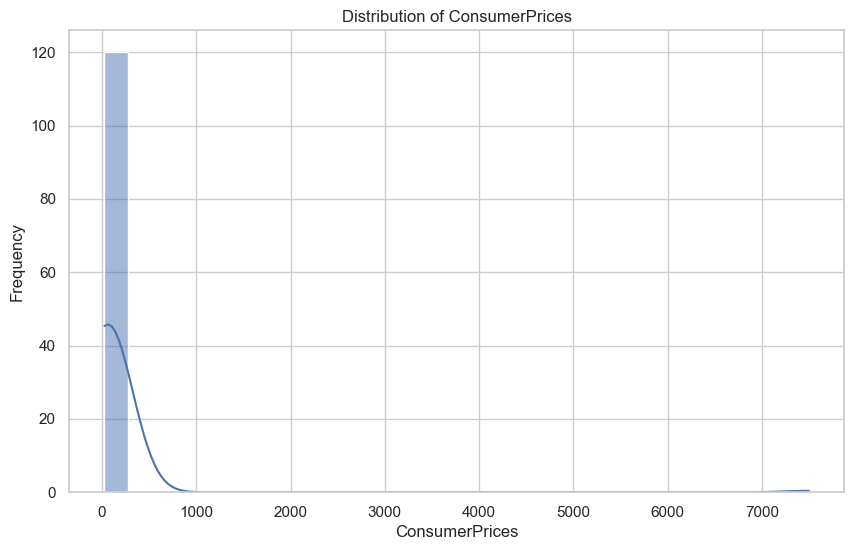

C:\Users\madzi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


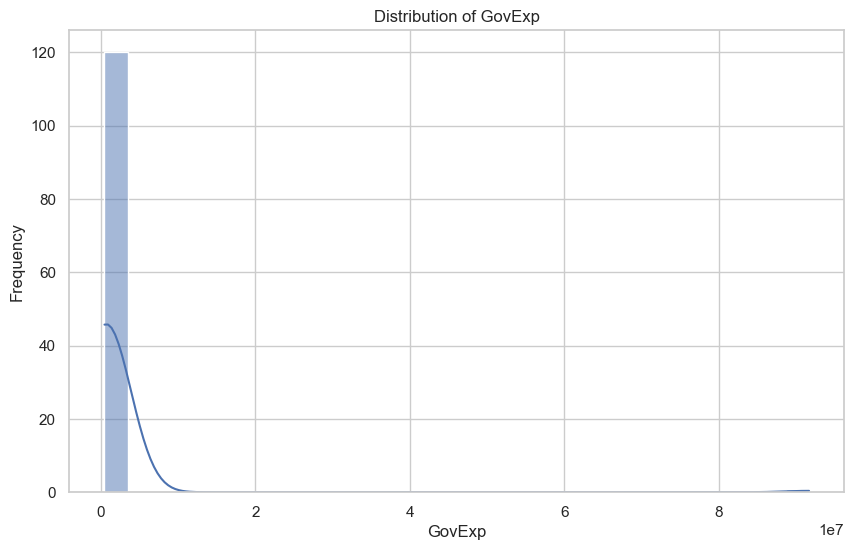

C:\Users\madzi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


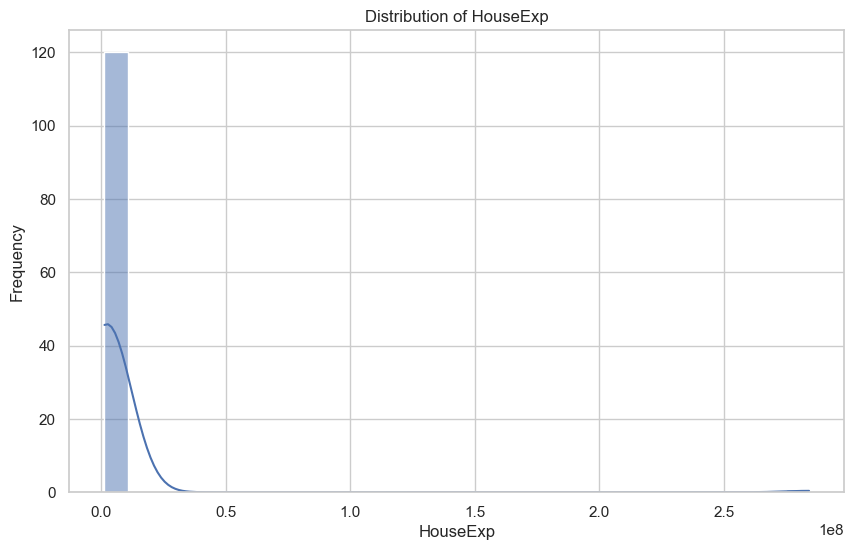

In [15]:
#Histograms for each numeric column
for column in df.columns:
    if column != 'Date':
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], bins=30, kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

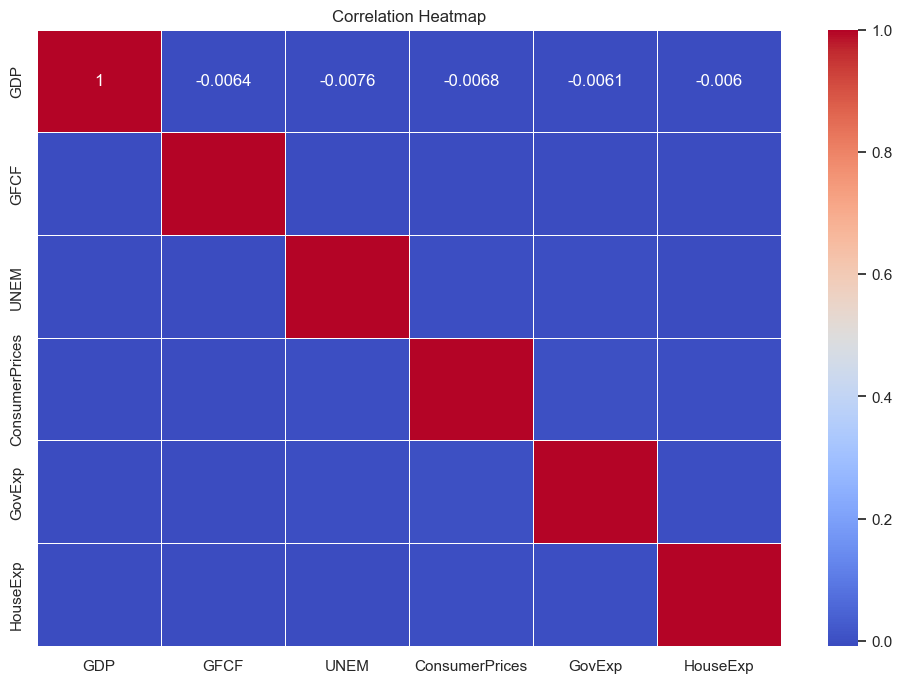

In [16]:
#Correlation Heatmap
# Dropping 'Date' as it doesn't make sense to include it in correlation analysis
correlation_matrix = df.drop(columns=['Date']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\madzi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\madzi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\madzi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\madzi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

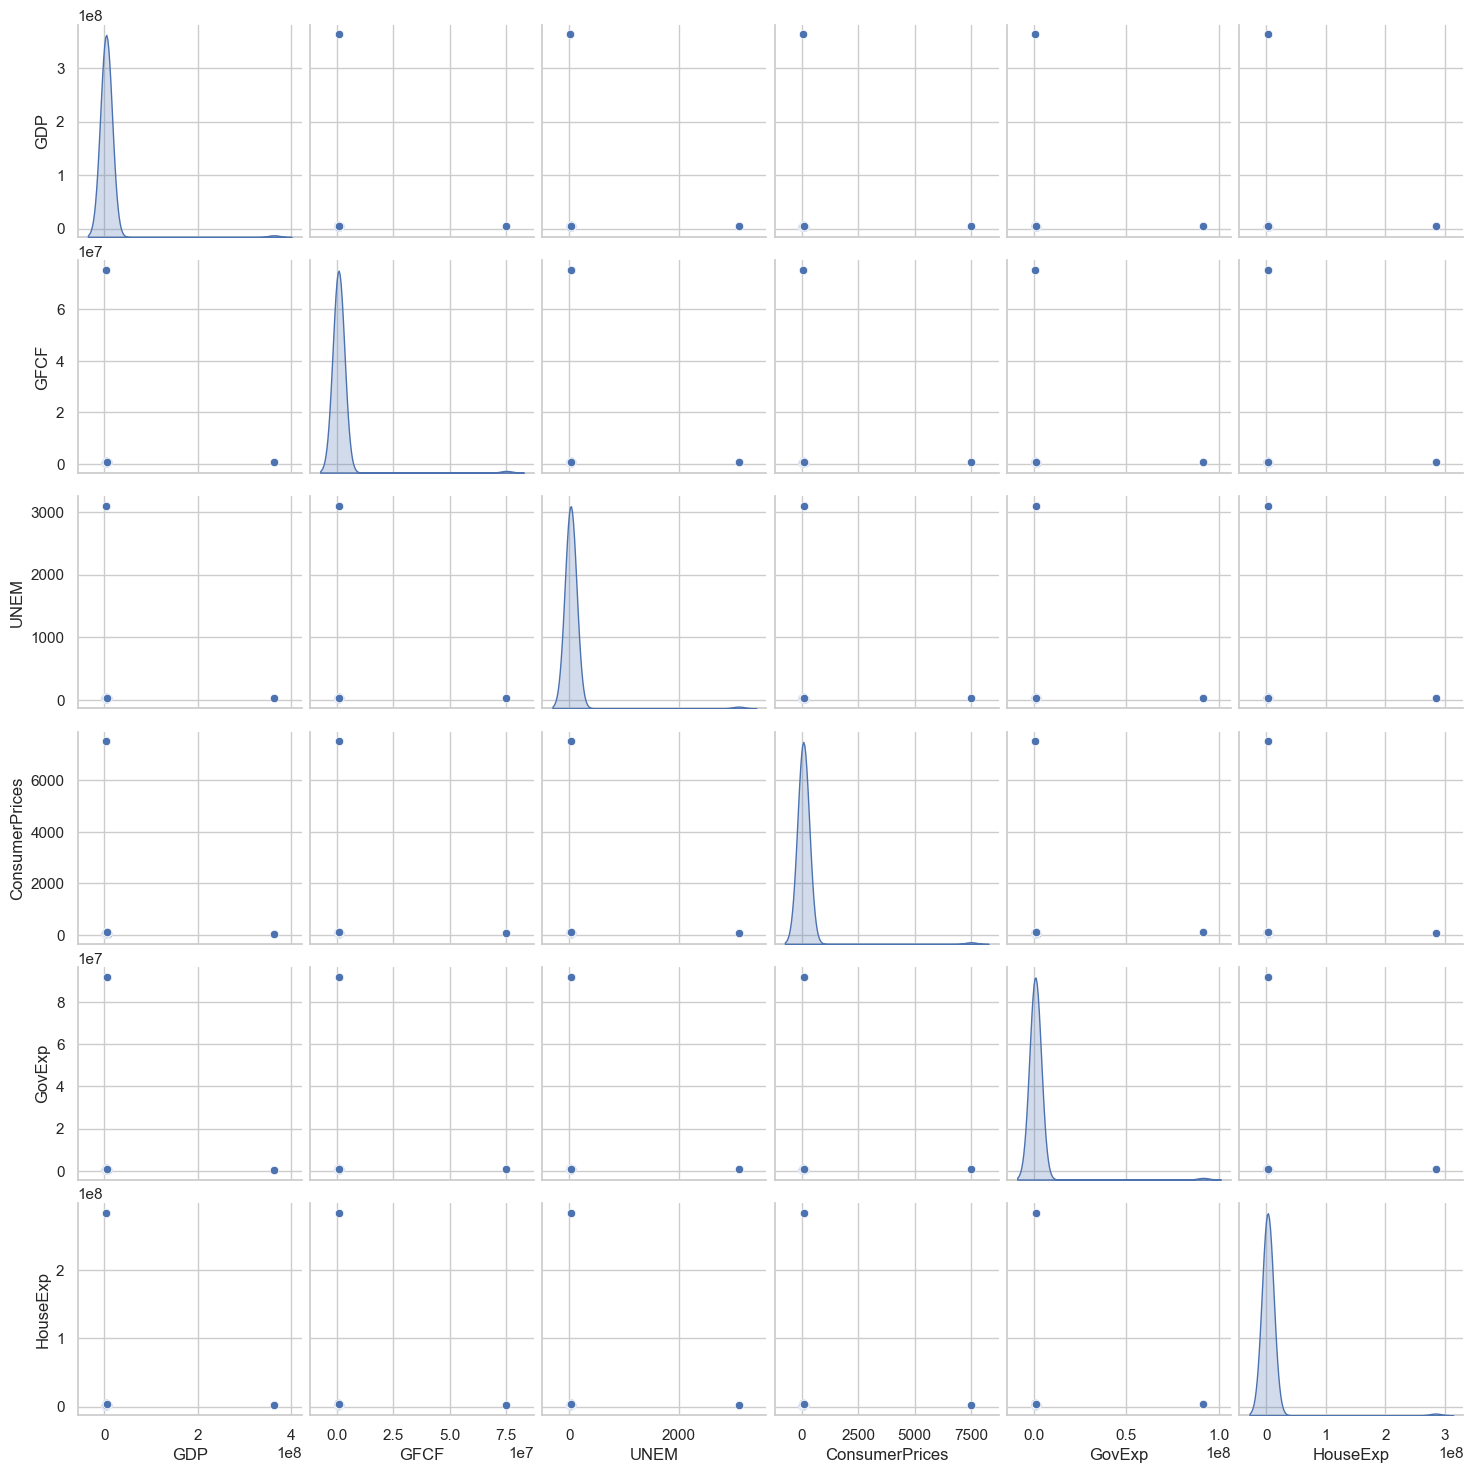

In [17]:
sns.pairplot(df,diag_kind='kde')

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
# I drop column 'Date' for modeling
df.drop(columns=['Date'], inplace=True)

In [20]:
# Check correlation with GDP to select features
correlation_matrix = df.corr()
print("Correlation with GDP:")
print(correlation_matrix['GDP'])

Correlation with GDP:
GDP               1.000000
GFCF             -0.006379
UNEM             -0.007556
ConsumerPrices   -0.006842
GovExp           -0.006094
HouseExp         -0.005993
Name: GDP, dtype: float64


In [21]:
# Select features based on correlation
X = df.drop('GDP',axis=1)
y = df['GDP']

### Performing the train test split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Linear Regression as a baseline
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [27]:
# Predict and evaluate
y_pred_lr = lr_model.predict(X_test_scaled)

In [28]:
# Metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}, RMSE: {rmse_lr}, R^2: {r2_lr}")

Linear Regression - MAE: 40789262.647533596, MSE: 2.5205772828923788e+16, RMSE: 158763260.32468528, R^2: -42243.89688995946


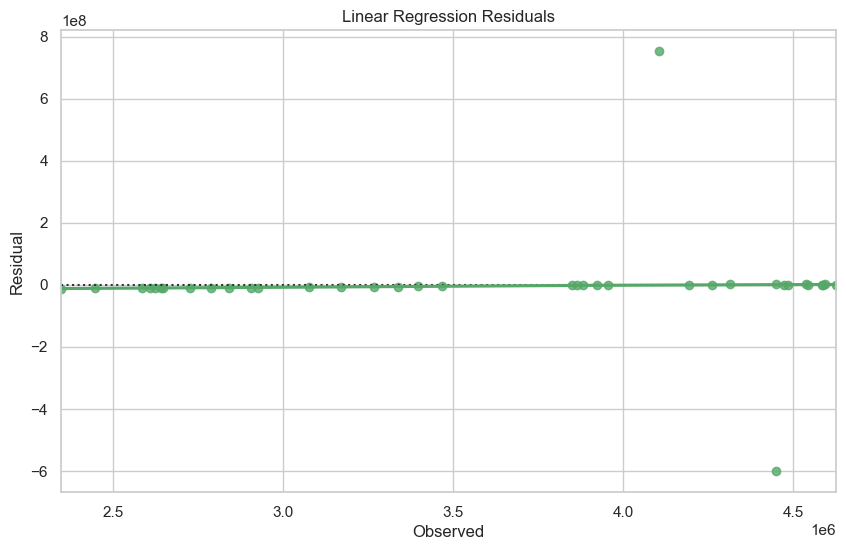

In [30]:
# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x = y_test, y = y_pred_lr, lowess=True, color="g")
plt.title('Linear Regression Residuals')
plt.xlabel('Observed')
plt.ylabel('Residual')
plt.show()

### RandomForest

In [31]:
# Feature importance (for RandomForest)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [32]:
# Metrics for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [33]:
print(f"Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, R^2: {r2_rf}")


Random Forest - MAE: 1211361.5662567571, MSE: 16951578220909.686, RMSE: 4117229.4350582026, R^2: -27.410859644131303


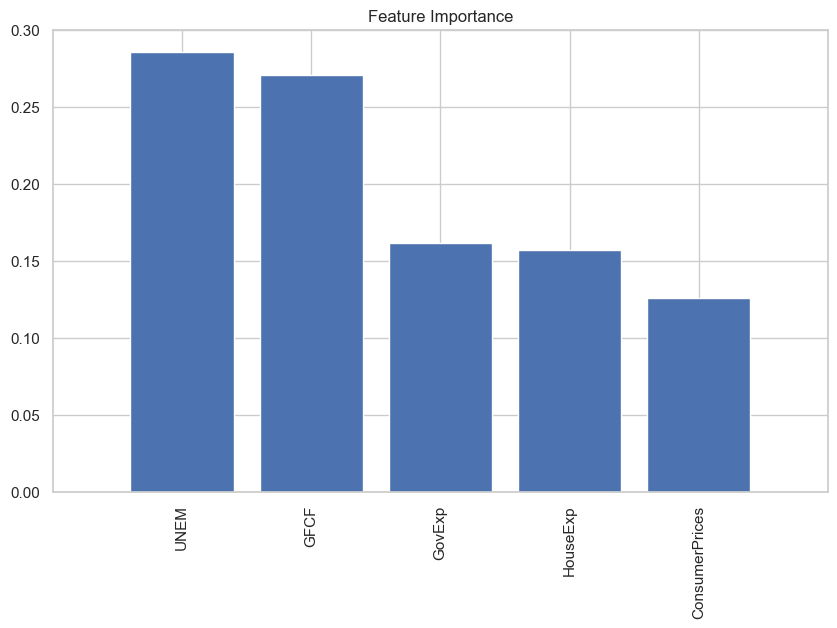

In [35]:
# Feature importance plot
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()